In [12]:
import os
import random
from PIL import Image
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
execfile("util/generate.py")


In [13]:
def autocrop_image(image):
    # Detect the background color by checking the color of the four corners of the image
    corner_colors = [image[0, 0], image[0, -1], image[-1, 0], image[-1, -1]]
    if all(np.all(color == [255, 255, 255]) for color in corner_colors):
        background_color = [255, 255, 255]  # white
    elif all(np.all(color == [0, 0, 0]) for color in corner_colors):
        background_color = [0, 0, 0]  # black
    else:
        raise ValueError('Unable to detect background color')

    # Find the bounding box of the non-background region
    mask = np.all(image != background_color, axis=-1)
    coords = np.argwhere(mask)
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0) + 1   # slices are exclusive at the top

    # Crop the image
    cropped_image = image[x_min:x_max, y_min:y_max]

    return cropped_image

In [14]:
image_path = "collection/cat.png"
image = cv2.imread(image_path)



In [15]:
image.shape

(504, 504, 3)

In [16]:
corner_colors = [image[0, 0], image[0, -10], image[-10, 0], image[-1, -1]]


In [17]:
corner_colors

[array([255, 255, 255], dtype=uint8),
 array([255, 255, 255], dtype=uint8),
 array([255, 255, 255], dtype=uint8),
 array([255, 255, 255], dtype=uint8)]

In [18]:
image = autocrop_image(image)

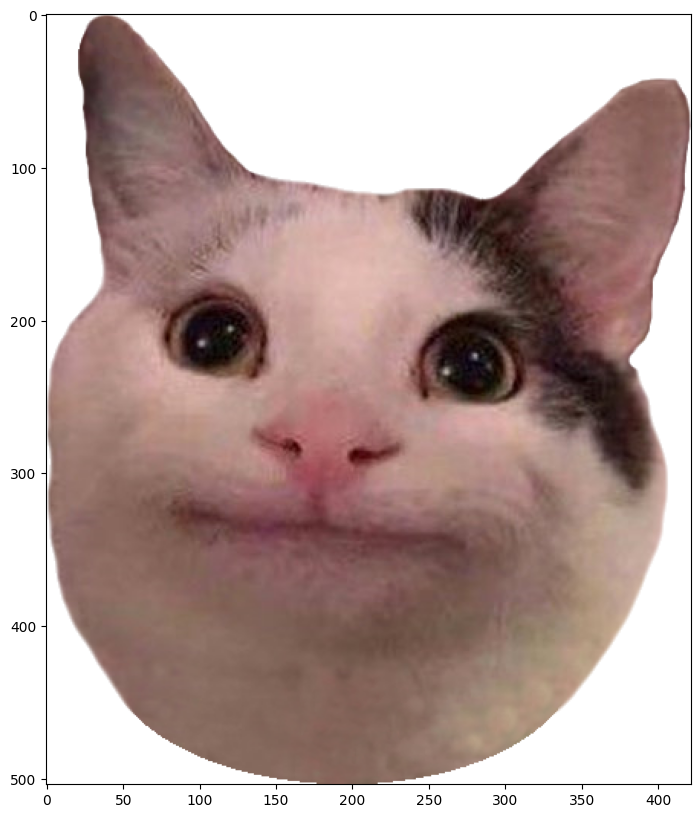

In [19]:
plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
plt.imshow(
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    )


plt.show()


In [20]:
a = np.random.randint(100, size=10)
b = np.random.randint(10, size=2)
c = np.array(a[b])

In [51]:

def create_shape(shape_type, size, shape_color):
    # Create a blank image with a white background
    # size = np.array(size, dtype=np.float64)
    image = np.ones((size, size, 3), dtype=np.uint8) * 255
    
    # # Set the color of the shape
    # if color == 'red':
    #     shape_color = (0, 0, 255)  # Red
    # elif color == 'green':
    #     shape_color = (0, 255, 0)  # Green
    # elif color == 'blue':
    #     shape_color = (255, 0, 0)  # Blue
    # else:
    #     shape_color = (0, 0, 0)  # Black
    # shape_color = list(shape_color)
    # shape_color = np.array([np.ndarray.item(0),np.ndarray.item(1),np.ndarray.item(2)])#
    shape_color = tuple([int(i) for i in shape_color])

    # Draw the shape on the image
    if shape_type == 'circle':
        center = (size // 2, size // 2)
        radius = size // 2
        cv2.circle(image, center, radius, shape_color, -1)
    elif shape_type == 'square':
        top_left = (0, 0)
        bottom_right = (size, size)
        cv2.rectangle(image, top_left, bottom_right, shape_color, -1)
    elif shape_type == 'triangle':
        points = np.array([[size // 2, 0], [0, size], [size, size]], np.int32)
        cv2.fillPoly(image, [points], shape_color)
    
    return image

def create_compound_shape(size, num_shapes=None, color_pallette = None):
    # Create a blank image with a white background
    image = np.ones((size, size, 3), dtype=np.uint8) * 255
    
    # Generate a random number of shapes
    if num_shapes is None:
        num_shapes = np.random.randint(2, 5)
    
    # Generate a random color for each shape
    if color_pallette is None:
        color_pallette = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]
    num_colors = len(color_pallette)
    random_indices = random.sample(range(num_colors), min(num_shapes, num_colors))
    shape_colors = np.array(color_pallette, dtype=np.uint8)[random_indices]
    
    # Create each shape and paste it on the image
    for i in range(num_shapes):
        # Generate a random shape type
        shape_type = np.random.choice(['circle', 'square', 'triangle'])
        
        # Generate a random size for the shape
        shape_size = np.random.randint(size // 3, size // 1.5)
        
        # Generate a random location for the shape
        x = np.random.randint(0, size - shape_size)
        y = np.random.randint(0, size - shape_size)
        
        # Create the shape
        # shape = create_shape(shape_type, shape_size, shape_colors[i])
        shape_color = tuple([int(j) for j in shape_colors[i]])
        # shape_color = shape_colors[i]

        # Draw the shape on the image
        if shape_type == 'circle':
            center = (x + shape_size // 2, y + shape_size // 2)
            radius = shape_size // 2
            cv2.circle(image, center, radius, shape_color, -1)
        elif shape_type == 'square':
            top_left = (x, y)
            bottom_right = (x + shape_size, y + shape_size)
            cv2.rectangle(image, top_left, bottom_right, shape_color, -1)
        elif shape_type == 'triangle':
            points = np.array([[(2*x + shape_size) // 2, y], [ x, y + shape_size ], [x + shape_size, y + shape_size]], np.int32)
            cv2.fillPoly(image, [points], shape_color)


    return image


In [23]:
import seaborn as sns

# sns.set_palette("husl")
cp =[i for i in sns.color_palette("husl", 8)]

# print(sns.color_palette()[0])
len(cp)
# sns.color_palette("husl", 8)

8

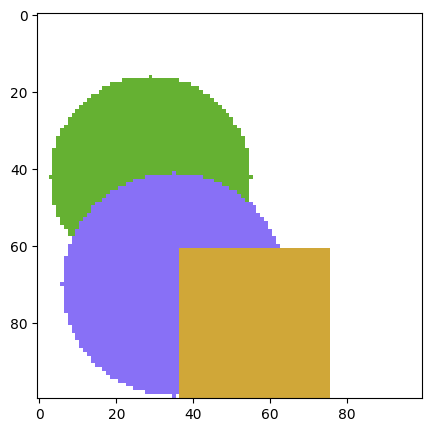

In [60]:
color_pallette = np.array([np.array(color) * 255 for color in sns.color_palette("husl", 8)], dtype=np.uint8)
shape = create_compound_shape(100, num_shapes=3, color_pallette=color_pallette)
plt.figure(figsize=(5,5))
# plt.subplot(1,2,1)
plt.imshow(
    cv2.cvtColor(shape, cv2.COLOR_BGR2RGB) 
    )
plt.show()